# Load Trial dataset with expert, crowd and ChatGPT annotations

Columns description:

label1, label2, label3, gpt-result - classes for ChatGPT annotation

label_1_x, label_2_x, label_3_x, result - classes for experts annotation; percentage_x - percentage of identical classes

label_1_y, label_2_y, label_3_y, label_toloker - classes for crowd-workers annotation

final_label - final class based on combining crowd and ChatGPT annotation

gpt_result2, label_toloker2 - classes if class 2 combined with class 0

In [169]:
import pandas as pd

folder_='../data/'
file_='trial804_experts_crowd_gpt.csv'

df_all_merged=pd.read_csv(folder_+file_, sep="|", encoding ='utf-8', index_col=False)
df_all_merged.drop('Unnamed: 0', axis=1, inplace=True)
df_all_merged.head()

,text,label1,label2,label3,gpt_result,label_1_x,label_2_x,label_3_x,result,percentage_x,label_1_y,label_2_y,label_3_y,label_toloker,percentage_y,final_label,gpt_result2,label_toloker2
0,"- интересный новый сервис, где можно оставить...",1,1,1,1,3.0,3.0,3.0,3,100.0,3,0,0,0.0,67,1.0,1,0.0
1,чет как-то нерадостно все это...особо на фоне...,0,0,0,0,0.0,0.0,0.0,0,100.0,1,0,0,0.0,67,0.0,0,0.0
2,#Repost with . ・・・ жаль что быстро убежала!!!#...,2,2,2,2,0.0,2.0,0.0,0,67.0,3,2,0,0.0,0,2.0,0,0.0
3,#hellomyearth #дорогажизни #разорванноекольцо,2,2,2,2,0.0,0.0,0.0,0,100.0,0,0,3,0.0,67,2.0,0,0.0
4,#ВтандемеСМамой#кактампробка#😁,2,2,2,2,0.0,0.0,0.0,0,100.0,1,0,0,0.0,67,2.0,0,0.0


Load procedures for Simpledorff Alpha and for Combining crowd and ChatGPT results

In [167]:
import simpledorff
def CalculateSimpledorffAlpha(df, column_names_list):
    
    df_melted=pd.melt(df, id_vars=['text'], value_vars=column_names_list)
    df_melted['value'] = df_melted['value'].astype(float, errors='ignore').astype(int, errors='ignore')
    alfa=simpledorff.calculate_krippendorffs_alpha_for_df(df_melted,experiment_col='text',
                                                 annotator_col='variable',
                                                 class_col='value')
    return alfa
    

In [168]:
import numpy as np

def CombineResults(df, label_toloker, percentage_toloker, gpt_result):
    
    df[label_toloker] = df[label_toloker].astype(float, errors='ignore').astype(int, errors='ignore')
    df[gpt_result] = df[gpt_result].astype(float, errors='ignore').astype(int, errors='ignore')
    
    df['final_label']=pd.Series(dtype='int')
    df[percentage_toloker] = df[percentage_toloker].astype(int)


    df['final_label']=df['gpt_result']
    df['final_label']=np.where((df[gpt_result] == 1)&(df[percentage_toloker]  == 100)&(df[label_toloker]  == 0), 0,\
                                    np.where((df[gpt_result] == 0)&(df[percentage_toloker]  == 100)&(df[label_toloker]  == 1), 1,\
                                   (np.where((df[label_toloker]  == 3),3, df[gpt_result]))))

    return df                               


In [170]:
print ("frequency distribution for expert annotation")
df_all_merged.result.value_counts()

frequency distribution for expert annotation


0    493
1    239
3     72
Name: result, dtype: int64

In [171]:
print ("frequency distribution for crowd annotation")
df_all_merged.label_toloker.value_counts()

frequency distribution for crowd annotation


0.0    479
1.0    242
3.0     79
2.0      4
Name: label_toloker, dtype: int64

In [172]:
print ("frequency distribution for ChatGPT annotation")
df.gpt_result.value_counts()

frequency distribution for ChatGPT annotation


1.0    2254
0.0    1722
2.0     967
3.0      92
Name: gpt_result, dtype: int64

# Calculate Simpledorff Alpha

In [173]:
alfa=CalculateSimpledorffAlpha(df_all_merged, ['label_1_y', 'label_2_y', 'label_3_y'])
print ('Crowd-workers, alfa for 4 classes:', alfa)

df_all_merged_g=df_all_merged.replace({'label_1_y': {2: 0}, 'label_2_y': {2: 0}, 'label_3_y': {2: 0}})
alfa=CalculateSimpledorffAlpha(df_all_merged_g, ['label_1_y', 'label_2_y', 'label_3_y'])
print ('Crowd-workers, alfa for 3 classes:', alfa)

Crowd-workers, alfa for 4 classes: 0.44181533439288323
Crowd-workers, alfa for 3 classes: 0.45686950150683225


In [174]:
alfa=CalculateSimpledorffAlpha(df_all_merged, ['label_1_x', 'label_2_x', 'label_3_x'])
print ('Experts, alfa for 4 classes:', alfa)

df_all_merged_g=df_all_merged.replace({'label_1_x': {2: 0}, 'label_2_x': {2: 0}, 'label_3_x': {2: 0}})
alfa=CalculateSimpledorffAlpha(df_all_merged_g, ['label_1_x', 'label_2_x', 'label_3_x'])
print ('Experts, alfa for 3 classes:', alfa)

Experts, alfa for 4 classes: 0.5352792759010108
Experts, alfa for 3 classes: 0.5714305099903783


In [175]:
alfa=CalculateSimpledorffAlpha(df_all_merged, ['label1', 'label2', 'label3'])
print ('ChatGPT, alfa for 4 classes:', alfa)

df_all_merged_g=df_all_merged.replace({'label1': {2: 0}, 'label2': {2: 0}, 'label3': {2: 0}})
alfa=CalculateSimpledorffAlpha(df_all_merged_g, ['label1', 'label2', 'label3'])
print ('ChatGPT, alfa for 3 classes:', alfa)

ChatGPT, alfa for 4 classes: 0.9534130854045563
ChatGPT, alfa for 3 classes: 0.975823256068921


# Accuracy

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [177]:
# if Nan - replace with 0
df_all_merged.result.replace({'Nan': 0}, inplace=True)
df_all_merged.result=df_all_merged.result.astype('int')

df_all_merged.gpt_result.replace({'Nan': 0}, inplace=True)
df_all_merged.gpt_result=df_all_merged.gpt_result.astype('int')

df_all_merged.label_toloker.replace({'Nan': 0}, inplace=True)
df_all_merged.label_toloker=df_all_merged.label_toloker.astype('int')

In [178]:
# gpt vs experts

acc_gpt=accuracy_score(df_all_merged.result.to_list(), df_all_merged.gpt_result.to_list())
print ('Accuracy ChatGpt, 4 classes:', acc_gpt)

df_all_merged['gpt_result2']=df_all_merged['gpt_result'].replace(2.0, 0.0)
acc_gpt=accuracy_score(df_all_merged.result.to_list(), df_all_merged.gpt_result2.to_list())
print ('Accuracy ChatGpt, 3 classes:', acc_gpt)

Accuracy ChatGpt, 4 classes: 0.5659203980099502
Accuracy ChatGpt, 3 classes: 0.7189054726368159


In [179]:
# crowd-workers vs experts

acc_label_toloker=accuracy_score(df_all_merged.result.to_list(), df_all_merged.label_toloker.to_list())
print ('Accuracy crowd-workers, 4 classes:', acc_label_toloker)

df_all_merged['label_toloker2']=df_all_merged['label_toloker'].replace(2.0, 0.0)
acc_label_toloker=accuracy_score(df_all_merged.result.to_list(), df_all_merged.label_toloker2.to_list())
print ('Accuracy crowd-workers, 3 classes:', acc_label_toloker)

Accuracy crowd-workers, 4 classes: 0.7325870646766169
Accuracy crowd-workers, 3 classes: 0.736318407960199


In [180]:
def PlotHeatMap(y_true, y_pred, x_name, y_name):
    fold='../img/'
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,3])
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(3, 3))
    ax=sns.heatmap(cmn, annot=True, fmt=".2f", linewidth=.5, cbar=False, xticklabels=['doesn\'t\nreflect', 'reflects', 'spam'], yticklabels=['doesn\'t\nreflect', 'reflects', 'spam'], annot_kws={"fontsize":10}, cmap='Blues')
    ax.xaxis.set_tick_params(labelsize = 9)
    ax.yaxis.set_tick_params(labelsize = 9)
    plt.xlabel(x_name, fontsize = 10)
    plt.ylabel(y_name, fontsize = 10)
    name=x_name+'_'+y_name+'.png'
    plt.savefig(fold+name, bbox_inches='tight')
    return plt.show()

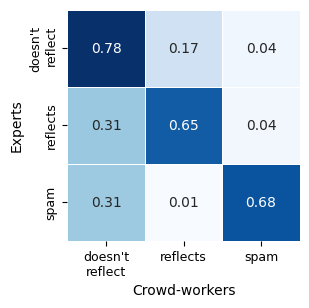

In [181]:
PlotHeatMap(df_all_merged.result.to_list(), df_all_merged.label_toloker2.to_list(), 'Crowd-workers', 'Experts')

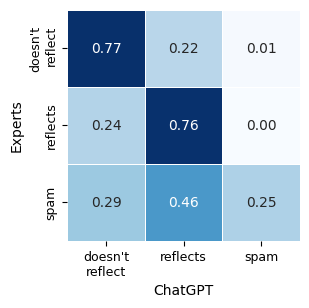

In [182]:
PlotHeatMap(df_all_merged.result.to_list(), df_all_merged.gpt_result2.to_list(), 'ChatGPT', 'Experts')

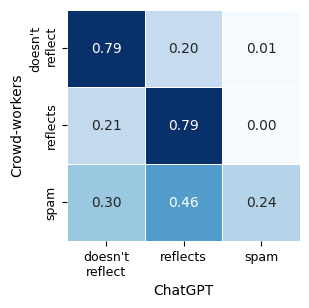

In [183]:
PlotHeatMap(df_all_merged.label_toloker2.to_list(), df_all_merged.gpt_result2.to_list(), 'ChatGPT', 'Crowd-workers')  

In [ ]:
# df_ex_gpt=df_all_merged.loc[df_all_merged.result==df_all_merged.gpt_result2]
# PlotHeatMap(df_ex_gpt.result.to_list(), df_ex_gpt.label_toloker2.to_list(), 'Crowd-workers', 'Experts & ChatGPT')

# Construct the final label - combine results of crowd-workers and ChatGPT

In [185]:
df_all_merged=CombineResults(df_all_merged, 'label_toloker2', 'percentage_y', 'gpt_result2')

In [186]:
print ("Frequency distribution for final classes")
df_all_merged.final_label.value_counts()


Frequency distribution for final classes


0    449
1    272
3     83
Name: final_label, dtype: int64

In [187]:
acc_gpt=accuracy_score(df_all_merged.result.to_list(), df_all_merged.final_label.to_list())
print ("Final annotation, Accuracy:", acc_gpt)

Final annotation, Accuracy: 0.7574626865671642


Confusion matrix for experts and Final annotation


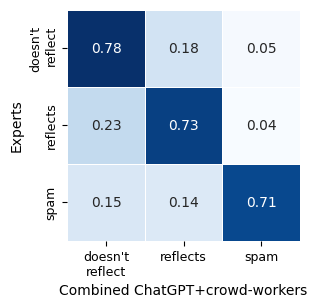

In [188]:
print ("Confusion matrix for experts and Final annotation")
PlotHeatMap(df_all_merged.result.to_list(), df_all_merged.final_label.to_list(), 'Combined ChatGPT+crowd-workers', 'Experts')

# Load annotated train data. Annotated by crowd-workers and ChatGPT

In [189]:
folder_='../data/'
file_train='train5035_crowd_gpt.csv'
df=pd.read_csv(folder_+file_train, sep="|", encoding ='utf-8', index_col=False)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,text,label_c1,label_c2,label_c3,label_crowd,percentage,label1,label2,label3,gpt_result,final_label
0,"Думаете, что умеете пользоваться фотошопом?...",3,0,0,0.0,67,2,2,2,2.0,0.0
1,...Самое страшное - это когда ты стоишь под х...,1,1,1,1.0,100,1,1,1,1.0,1.0
2,Друзья мои! Поддержим дочку моей подруги! Про...,0,1,0,0.0,67,1,1,1,1.0,1.0
3,"Мой новый дневник, читаем, коментим :)",0,0,0,0.0,100,0,0,0,0.0,0.0
4,РУССКИЙ КРЫМ - МИФ для быдла! (о чем молчат ...,0,0,3,0.0,67,2,2,2,2.0,0.0


In [1]:
# Columns description:
# label_c1, label_c2, label_c3, label_crowd - classes for crowd-workers annotation, percentage - percentage of identical classes
# label1, label2, label3, gpt_result - classes for ChatGPT annotation
# final_label -  final class based on combining crowd and ChatGPT annotation

In [190]:
print ("frequency distribution for crowd-workers")
df.label_crowd.value_counts(dropna=False)

frequency distribution for crowd-workers


0.0    2762
1.0    1539
3.0     539
NaN     174
2.0      21
Name: label_crowd, dtype: int64

In [191]:
print ("frequency distribution for ChatGPT")
df.gpt_result=df.gpt_result.astype('float', errors='ignore').astype('int', errors='ignore')
df.gpt_result.value_counts(dropna=False)

frequency distribution for ChatGPT


1.0    2254
0.0    1721
2.0     967
3.0      92
NaN       1
Name: gpt_result, dtype: int64

In [192]:
# to replace Nan with 0:
df['label_crowd'] = df['label_crowd'].fillna(0)

In [193]:
# if Nan - replace with 0
df['gpt_result'] = df['gpt_result'].fillna(0)

In [195]:
alfa=CalculateSimpledorffAlpha(df, ['label1', 'label2', 'label3'])
print ("ChatGPT, alfa for 4 classes", alfa)

df_g=df.replace({'label1': {2: 0}, 'label2': {2: 0}, 'label3': {2: 0}})
alfa=CalculateSimpledorffAlpha(df_g, ['label1', 'label2', 'label3'])
print ("ChatGPT, alfa for 3 classes", alfa)

ChatGPT, alfa for 4 classes 0.9626015053442392
ChatGPT, alfa for 3 classes 0.9747143224124237


In [196]:
alfa=CalculateSimpledorffAlpha(df, ['label_c1', 'label_c2', 'label_c3'])
print ("Crowd-workers, alfa for 4 classes", alfa)

df_g=df.replace({'label_c1': {2: 0}, 'label_c2': {2: 0}, 'label_c3': {2: 0}})
alfa=CalculateSimpledorffAlpha(df_g, ['label_c1', 'label_c2', 'label_c3'])
print ("Crowd-workers, alfa for 3 classes", alfa)


Crowd-workers, alfa for 4 classes 0.3885869094841752
Crowd-workers, alfa for 3 classes 0.3968916500075802


In [197]:
# combine "not clear" with "doesn't reflect"
df['gpt_result2']=df['gpt_result'].replace(2.0, 0.0)
df['label_crowd2']=df['label_crowd'].replace(2.0, 0.0)

In [198]:
# Calculate final classes:
df=CombineResults(df, 'label_crowd2', 'percentage', 'gpt_result2')
print ("frequency distribution for final classes")
df.final_label.value_counts()

frequency distribution for final classes


0    2741
1    1734
3     560
Name: final_label, dtype: int64